In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### TU257 - Machine Learning - Grid Search

#### Run this notebook and examine what is produced for each cell.

#### Add your own comments to enrich the information given to make it more meaningful to you.

#### In this notebook we will have a look at how to run a GridSearch

#### This notebook is an extention of the previous examples

In [2]:
import pandas as pd

#Load in the dataset
colnames=['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Edu_Num', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain', 'CapitalLoss', 'HrPerWk', 'Native', 'Target'] 
df = pd.read_csv('/Users/brendan.tierney/Dropbox/4-Datasets/adult.csv', names=colnames, header=None)
df.head(10)

,Age,WorkClass,Fnlwgt,Education,Edu_Num,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HrPerWk,Native,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.isnull().values.any()

False

In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  32561
Columns  :  15

Features : 
 ['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Edu_Num', 'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain', 'CapitalLoss', 'HrPerWk', 'Native', 'Target']

Missing values :   0

Unique values :  
 Age                 73
WorkClass            9
Fnlwgt           21648
Education           16
Edu_Num             16
MaritalStatus        7
Occupation          15
Relationship         6
Race                 5
Sex                  2
CapitalGain        119
CapitalLoss         92
HrPerWk             94
Native              42
Target               2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            32561 non-null  int64 
 1   WorkClass      32561 non-null  object
 2   Fnlwgt         32561 non-null  int64 
 3   Education      32561 non-null  object
 4   Edu_Num        32561 non-null  int64 
 5   MaritalStatus  32561 non-null  object
 6   Occupation     32561 non-null  object
 7   Relationship   32561 non-null  object
 8   Race           32561 non-null  object
 9   Sex            32561 non-null  object
 10  CapitalGain    32561 non-null  int64 
 11  CapitalLoss    32561 non-null  int64 
 12  HrPerWk        32561 non-null  int64 
 13  Native         32561 non-null  object
 14  Target         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Numerical feature of summary/description 
df.describe()

,Age,Fnlwgt,Edu_Num,CapitalGain,CapitalLoss,HrPerWk
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# checking "?" values, how many are there in the whole dataset
df_missing = (df=='?').sum()
df_missing

Age              0
WorkClass        0
Fnlwgt           0
Education        0
Edu_Num          0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Sex              0
CapitalGain      0
CapitalLoss      0
HrPerWk          0
Native           0
Target           0
dtype: int64

In [8]:
df['Target'].value_counts()/len(df)   #calculate percentages

 <=50K    0.75919
 >50K     0.24081
Name: Target, dtype: float64

In [9]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,Native,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [10]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,Native,Target
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [11]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)

# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,Age,Fnlwgt,Edu_Num,CapitalGain,CapitalLoss,HrPerWk,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,Native,Target
0,39,77516,13,2174,0,40,7,9,4,1,1,4,1,39,0
1,50,83311,13,0,0,13,6,9,2,4,0,4,1,39,0
2,38,215646,9,0,0,40,4,11,0,6,1,4,1,39,0
3,53,234721,7,0,0,40,4,1,2,6,0,2,1,39,0
4,28,338409,13,0,0,40,4,9,2,10,5,2,0,5,0


In [12]:
corr_matrix=df.corr()
corr_matrix

,Age,Fnlwgt,Edu_Num,CapitalGain,CapitalLoss,HrPerWk,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,Native,Target
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.003787,-0.010508,-0.266288,-0.020947,-0.263698,0.028718,0.088832,-0.001151,0.234037
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.016656,-0.028145,0.028153,0.001597,0.008931,-0.021291,0.026858,-0.051966,-0.009463
Edu_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.052085,0.359153,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.050840,0.335154
CapitalGain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.033835,0.030046,-0.043393,0.025505,-0.057919,0.011145,0.048480,-0.001982,0.223329
CapitalLoss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.012216,0.016746,-0.034187,0.017987,-0.061062,0.018899,0.045567,0.000419,0.150526
HrPerWk,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138962,0.055510,-0.190519,0.080383,-0.248974,0.041910,0.229309,-0.002671,0.229689
WorkClass,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,1.000000,0.023513,-0.064731,0.254892,-0.090461,0.049742,0.095981,-0.007690,0.051604
Education,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,0.023513,1.000000,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.064288,0.079317
MaritalStatus,-0.266288,0.028153,-0.069304,-0.043393,-0.034187,-0.190519,-0.064731,-0.038407,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.023819,-0.199307
Occupation,-0.020947,0.001597,0.109697,0.025505,0.017987,0.080383,0.254892,-0.021260,-0.009654,1.000000,-0.075607,0.006763,0.080296,-0.012543,0.075468


<Axes: >

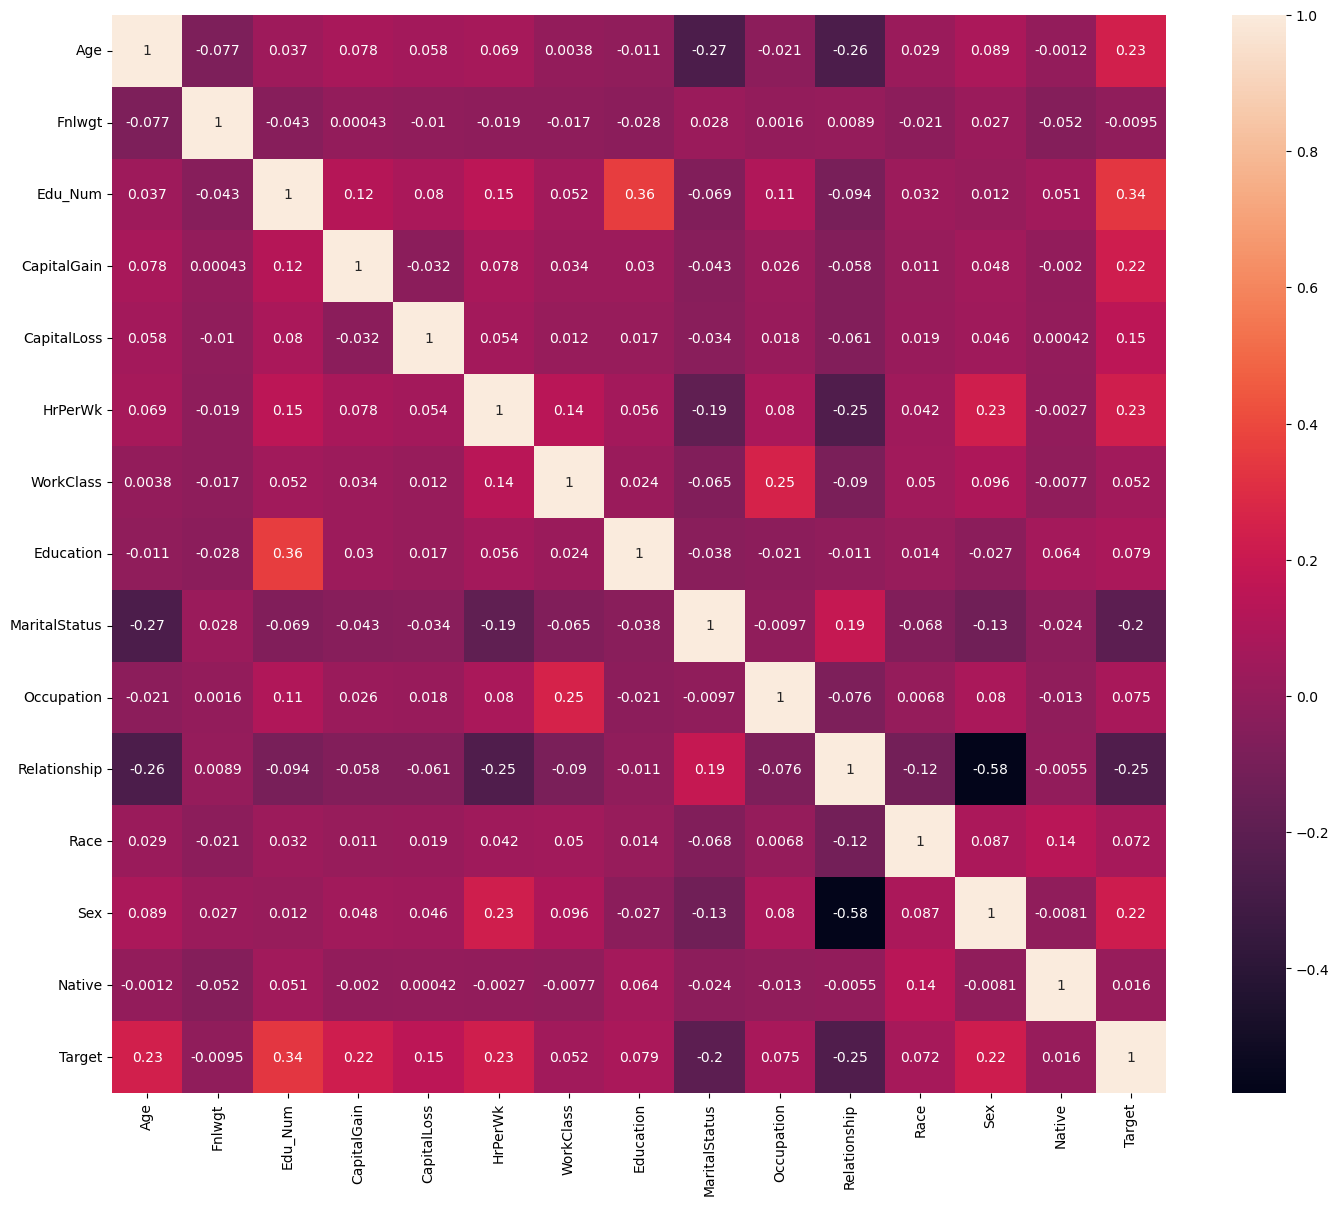

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(17,14))
sn.heatmap(corr_matrix, annot=True)

In [14]:
df['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

# Putting independent variables/features to X
X = df.drop('Target',axis=1)

# Putting response/dependent variable/feature to y
y = df['Target']

In [16]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

In [17]:
y_train.dtypes
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X_train)/(len(X_train)+len(X_test)))
print(len(X_test)/(len(X_train)+len(X_test)))

22792
22792
9769
9769
0.6999785018887626
0.30002149811123735


## Random Grid Search
### for RandomForest()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#The following creates a RandomForest using default parameters with max_depth=5
#rf_default = RandomForestClassifier(max_depth=5)
#rf_default.fit(X_train,y_train)

In [19]:
#Challenge: What are the different parameters for RandomForest?
# Open Google and search for the RandomForest documentation. 

In [20]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
#    'max_depth': [3, 6, 9],
#    'max_leaf_nodes': [3, 6, 9],
}


In [21]:
#RandomizedSearchCV will select a Random selection of values for each parameter.
# This might not be suitable as it might miss important values

## WARNING: This will take many minutes to run

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)

random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

#Check out this webpage for more RandomizedSearchCV details
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

RandomForestClassifier(max_features='log2', n_estimators=50)


In [22]:
# random random search results
print('Best random search hyperparameters are: '+str(random_search.best_params_))
print('Best random search score is: '+str(random_search.best_score_))
print('Best estimator is: '+str(random_search.best_estimator_))

Best random search hyperparameters are: {'n_estimators': 50, 'max_features': 'log2'}
Best random search score is: 0.854729887821523
Best estimator is: RandomForestClassifier(max_features='log2', n_estimators=50)


In [23]:
import warnings
warnings.filterwarnings('ignore')

## Now let's look at a Grid Search, where we can specify a range of values to try

In [24]:
rfc = RandomForestClassifier()

#GridSearch can take a lot of time!   We will only use these 2 parameters as an example
forest_params = [{'max_depth': list(range(2, 6)), 
                  'max_features': list(range(3, 8))}]

## WARNING: This will take many minutes to run

grid_search = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

#this next command will take some time!
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5],
                          'max_features': [3, 4, 5, 6, 7]}],
             scoring='accuracy')

In [25]:
print('Best hyperparameters are: '+str(grid_search.best_params_))
print('Best score is: '+str(grid_search.best_score_))
print('Best estimator is: '+str(grid_search.best_estimator_))

Best hyperparameters are: {'max_depth': 5, 'max_features': 7}
Best score is: 0.8528872119966436
Best estimator is: RandomForestClassifier(max_depth=5, max_features=7)


In [26]:
#Question: Add one or two more parameters to the above examples, and add list/range of values
#          Rerun to see if there is a difference in outcome
#
#          Take note of the timing for adding each parameter
#
# Copy the above code, paste it below, and run
#

In [27]:
#Question: Now try using a different Algorithm. One we have looked at previously

In [28]:
from xgboost import XGBClassifier
